In [1]:
import pygplates
import matplotlib.pyplot as plt
import paleogeography as pg

%matplotlib inline



basedir = '/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles/'

time = 126 #255.  # this time must match one of the specific times for which there are valid polygons

sampling = 1.0   # set the resolution of the rasterising - smaller number --> slower

rotation_model = pygplates.RotationModel(['%s/Global_EB_250-0Ma_GK07_Matthews++.rot' % basedir,
                                          '%s/Global_EB_410-250Ma_GK07_Matthews++.rot' % basedir])

pg_dir = '%s/PresentDay_Paleogeog_Matthews2016_%dMa/' % (basedir,time)



In [2]:
# load all the features from the different environment categories into a single collection of features
pg_features = pg.load_paleogeography(pg_dir)

# rasterise points using default environment list - result is a set of multipoints
pg_points = pg.rasterise_paleogeography(pg_features,rotation_model,time,sampling=sampling)



['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_126Ma/lm_fig46_135_117_PresentDay_Paleogeog_Matthews2016_126.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_126Ma/m_fig46_135_117_PresentDay_Paleogeog_Matthews2016_126.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_126Ma/sm_fig46_135_117_PresentDay_Paleogeog_Matthews2016_126.00Ma.shp']
[]
no features of type i


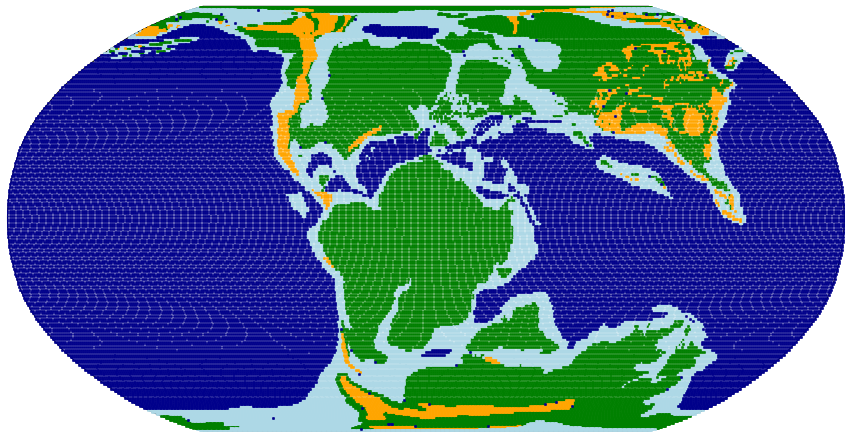

In [3]:
env_color_dict = {'lm':'green',
                  'm':'orange',
                  'sm':'lightblue',
                  'i':'blue'}

plt.figure(figsize=(15,8))

m = pg.paleogeography_points_basemap(pg_points,env_color_dict,fill_color='darkblue',markersize=5)

plt.show()


In [24]:
from create_gpml import create_gpml_regular_long_lat_mesh, create_gpml_healpix_mesh

def rasterise_paleogeography(pg_features,rotation_model,time,sampling=0.5,env_list=None,meshtype='LongLatGrid'):
    # takes paleogeography polygons like those from Cao++ 2017 and converts them
    # into a raster
    # if meshtype is set to 'healpix', sampling should be set to an integer defining nSide

    #pg_features = load_paleogeography(pg_dir,env_list)
    if meshtype=='healpix':
        raster_domain = create_gpml_healpix_mesh(sampling,filename=None,feature_type='MeshNode')
    else:
        raster_domain = create_gpml_regular_long_lat_mesh(sampling,filename=None,feature_type='MeshNode')

    plate_partitioner = pygplates.PlatePartitioner(pg_features, rotation_model, reconstruction_time=time)

    pg_points = plate_partitioner.partition_features(raster_domain,
                                                     properties_to_copy=[pygplates.PropertyName.gpml_shapefile_attributes,
                                                                         pygplates.PartitionProperty.reconstruction_plate_id])

    return pg_points


def run_grid_pip(time,points,polygons,rotation_model,grid_dims):

    reconstructed_polygons = []
    pygplates.reconstruct(polygons,rotation_model,reconstructed_polygons,time)

    rpolygons = []
    for polygon in reconstructed_polygons:
        if polygon.get_reconstructed_geometry():
            rpolygons.append(polygon.get_reconstructed_geometry())

    polygons_containing_points = points_in_polygons.find_polygons(points, rpolygons)

    lat = []
    lon = []
    zval = []
    for pcp,point in zip(polygons_containing_points,points):
        lat.append(point.get_latitude())
        lon.append(point.get_longitude())
        if pcp is not None:
            zval.append(1)
        else:
            zval.append(0)

    bi = np.array(zval).reshape(grid_dims[0],grid_dims[1])

    return bi




#time_list = [6,14,22,33,45,53,76,90,105,126,140]
tmp = glob.glob('%s/*/' % basedir)

time_list = []
for tm in tmp:
    time_list.append(float(re.findall(r'\d+Ma+',tm)[1][:-2]))

time_list.sort()

pg_points_list = []


for time in time_list:
    
    pg_dir = '%s/PresentDay_Paleogeog_Matthews2016_%dMa/' % (basedir,time)
    pg_features = pg.load_paleogeography(pg_dir)
    
    for feature in pg_features:
        pg_valid_time = feature.get_valid_time()
        break

    # rasterise points using default environment list - result is a set of multipoints
    pg_points = rasterise_paleogeography(pg_features,rotation_model,time,sampling=sampling)


    pg_points_clip = []
    for pg_point in pg_points:
        if pg_point.get_shapefile_attribute('Layer') in ['lm','m','i']:
            pg_point.set_valid_time(pg_valid_time[0],pg_valid_time[1])
            pg_points_clip.append(pg_point)
    
    
    pg_points_list+=pg_points_clip
    
    
    '''
    rpg_points = []
    pygplates.reconstruct(pg_points_clip,rotation_model,rpg_points,time)

    plt.figure(figsize=(15,8))
    for point in rpg_points:
        plt.plot(point.get_reconstructed_geometry().to_lat_lon_array()[:,1],
                 point.get_reconstructed_geometry().to_lat_lon_array()[:,0],'k.',markersize=6,alpha=0.5)
        
    rpg_points = []
    pygplates.reconstruct(pg_points_clip,rotation_model,rpg_points,time+15)

    plt.figure(figsize=(15,8))
    for point in rpg_points:
        plt.plot(point.get_reconstructed_geometry().to_lat_lon_array()[:,1],
                 point.get_reconstructed_geometry().to_lat_lon_array()[:,0],'k.',markersize=6,alpha=0.5)
    #m = pg.paleogeography_points_basemap(pg_points_clip,env_color_dict,fill_color='darkblue',markersize=3,alpha=0.5)
    
    plt.show()
    '''


['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_6Ma/lm_fig64_11_2_PresentDay_Paleogeog_Matthews2016_6.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_6Ma/m_fig64_11_2_PresentDay_Paleogeog_Matthews2016_6.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_6Ma/sm_fig64_11_2_PresentDay_Paleogeog_Matthews2016_6.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_6Ma/i_fig64_11_2_PresentDay_Paleogeog_Matthews2016_6.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2M

In [25]:
pygplates.FeatureCollection(pg_points_list).write('pg_points_tmp.gpmlz')

In [ ]:
def run_grid_pnp(recon_time, 
                 points, 
                 spatial_tree_of_uniform_recon_points, 
                 polygons, 
                 rotation_model, 
                 distance_threshold_radians=2):

    reconstructed_polygons = []
    pygplates.reconstruct(polygons, rotation_model, reconstructed_polygons, recon_time)
    rpolygons = []
    for polygon in reconstructed_polygons:
        if polygon.get_reconstructed_geometry():
            rpolygons.append(polygon.get_reconstructed_geometry())
                
    res1 = find_closest_geometries_to_points_using_points_spatial_tree(points,
                                                                    spatial_tree_of_uniform_recon_points,
                                                                    rpolygons,
                                                                    distance_threshold_radians = distance_threshold_radians,
                                                                    geometries_are_solid = False)

    distance_to_polygon_boundary = np.array(zip(*res1)[0])

    # Make a copy of list of distances.
    distance_to_polygon = list(distance_to_polygon_boundary)

    # Set distance to zero for any points inside a polygon (leave other points unchanged).
    res2 = points_in_polygons.find_polygons_using_points_spatial_tree(points,
                                                                     spatial_tree_of_uniform_recon_points,
                                                                     rpolygons)
    for point_index, rpolygon in enumerate(res2):
        # If not inside any polygons then result will be None.
        if rpolygon:
            distance_to_polygon[point_index] = 0.0

    distance_to_polygon = np.array(distance_to_polygon)

    return distance_to_polygon,distance_to_polygon_boundary